In [20]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from models import EMDensityEstimator
from targets import Target
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


tensor([[-0.0709, -0.0533, -0.0574,  ...,  0.6566,  0.1622,  0.0790],
        [-0.0073,  0.0216, -0.0328,  ...,  1.0331,  0.1626,  0.0193],
        [-0.0291,  0.0084,  0.0295,  ...,  1.0067,  0.2319, -0.0037],
        ...,
        [ 0.0539, -0.1720,  0.0752,  ...,  0.6505, -0.0130, -0.0598],
        [-0.0282,  0.0177,  0.4338,  ...,  0.5694,  0.0320, -0.0404],
        [-0.0071, -0.0848,  0.3539,  ...,  0.1758,  0.0658, -0.0986]])
number of training samples182


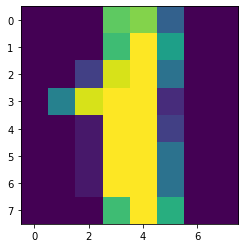

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digit = 1

extracted = digits.data[digits.target == digit]
plt.imshow(digits.images[digits.target == digit][0])
target_samples = torch.tensor(extracted).float()
target_samples = (target_samples + torch.randn(target_samples.shape))/16
print(target_samples)
p = target_samples.shape[1]
num_samples = target_samples.shape[0]

print("number of training samples"  +str(num_samples))
train_set, test_set = target_samples[:120], target_samples[120:]

In [22]:
num_samples = target_samples.shape[0]
epochs = 20
loss_values_list_EM = []
K = 20
for _ in range(50):
    EM = EMDensityEstimator(target_samples,K)
    loss_values = EM.train(epochs,visual=False)
    loss_values_list_EM.append(loss_values)

 15%|█████████████████████████████████████▎                                                                                                                                                                                                                   | 3/20 [00:00<00:00, 113.03it/s, loss = -59.869773864746094]


ValueError: Expected value argument (Tensor of shape (182, 20, 64)) to be within the support (IndependentConstraint(Real(), 1)) of the distribution MultivariateNormal(loc: torch.Size([64]), covariance_matrix: torch.Size([64, 64])), but found invalid values:
tensor([[[-1.0618e+00, -7.5418e-01, -2.0837e+00,  ...,  4.6764e-01,
           1.9920e+00,  2.2130e+00],
         [-1.0160e+01, -7.4763e-01, -1.4097e+01,  ..., -1.3431e+01,
          -3.3939e+00, -1.5385e+00],
         [-2.0472e+00, -1.4489e+00, -1.3411e+00,  ...,  1.0763e+00,
           1.9288e+00,  1.2451e+00],
         ...,
         [-4.3026e-01, -7.2750e-01, -1.4383e+00,  ...,  2.6624e+00,
           2.3606e+00,  1.4159e+00],
         [-9.8745e-01, -1.1618e+00, -8.7280e-01,  ..., -3.8959e+00,
          -7.7850e-01,  1.4842e+00],
         [-1.2003e+00, -7.7116e-01, -1.2708e+00,  ...,  1.6384e+00,
           1.1394e+00,  1.2140e+00]],

        [[-3.4646e-02,  2.3639e-01, -1.9514e+00,  ...,  1.6021e+00,
           1.9989e+00,  1.1354e+00],
         [-5.4137e+00,  5.1387e-01, -1.2748e+01,  ...,  3.3145e+00,
          -3.3912e+00, -1.7824e+00],
         [-7.0572e-01,  2.0232e-01, -1.2245e+00,  ...,  2.4914e+00,
           1.9354e+00,  3.6043e-01],
         ...,
         [ 4.0675e-01,  1.0122e-01, -1.1323e+00,  ...,  4.5580e+00,
           2.3671e+00,  1.9406e-02],
         [ 4.4828e-01,  8.3649e-02, -3.8222e-01,  ...,  1.5863e+00,
          -7.7628e-01,  4.0107e-01],
         [-1.4247e-01,  1.2416e-01, -1.1607e+00,  ...,  2.9710e+00,
           1.1429e+00,  3.0784e-01]],

        [[-3.8643e-01,  6.1678e-02, -1.6170e+00,  ...,  1.5225e+00,
           3.1319e+00,  7.2061e-01],
         [-7.0394e+00,  2.9138e-01, -9.3367e+00,  ...,  2.1397e+00,
          -2.9417e+00, -1.8763e+00],
         [-1.1652e+00, -8.8908e-02, -9.2955e-01,  ...,  2.3921e+00,
           3.0220e+00,  1.9869e-02],
         ...,
         [ 1.2008e-01, -4.4943e-02, -3.5888e-01,  ...,  4.4250e+00,
           3.4486e+00, -5.1819e-01],
         [-4.3443e-02, -1.3602e-01,  8.5785e-01,  ...,  1.2017e+00,
          -4.1217e-01, -1.5903e-02],
         [-5.0476e-01, -3.3750e-02, -8.8230e-01,  ...,  2.8775e+00,
           1.7136e+00, -4.0983e-02]],

        ...,

        [[ 9.5303e-01, -2.3235e+00, -1.3714e+00,  ...,  4.4935e-01,
          -8.7212e-01, -2.9102e-01],
         [-8.4930e-01, -2.7462e+00, -6.8315e+00,  ..., -1.3701e+01,
          -4.5303e+00, -2.1053e+00],
         [ 5.8427e-01, -4.0647e+00, -7.1297e-01,  ...,  1.0535e+00,
          -8.1798e-01, -8.1069e-01],
         ...,
         [ 1.2116e+00, -2.0404e+00,  2.0910e-01,  ...,  2.6318e+00,
          -3.7313e-01, -1.8293e+00],
         [ 1.8289e+00, -3.1350e+00,  1.7685e+00,  ..., -3.9843e+00,
          -1.6989e+00, -1.0328e+00],
         [ 8.7468e-01, -2.1896e+00, -6.7787e-01,  ...,  1.6170e+00,
          -3.0313e-01, -8.9169e-01]],

        [[-3.7296e-01,  1.8505e-01,  5.5490e-01,  ...,  2.0504e-01,
          -1.3676e-01,  6.0259e-02],
         [-6.9772e+00,  4.4849e-01,  1.2820e+01,  ..., -1.7307e+01,
          -4.2385e+00, -2.0257e+00],
         [-1.1476e+00,  1.1674e-01,  9.8600e-01,  ...,  7.4875e-01,
          -1.1275e-01, -5.2228e-01],
         ...,
         [ 1.3105e-01,  5.8271e-02,  4.6647e+00,  ...,  2.2236e+00,
           3.2874e-01, -1.3740e+00],
         [-2.4622e-02,  1.9098e-02,  8.9125e+00,  ..., -5.1650e+00,
          -1.4626e+00, -6.7969e-01],
         [-4.9089e-01,  7.7759e-02,  9.2580e-01,  ...,  1.3300e+00,
           6.7242e-02, -5.9629e-01]],

        [[-3.1474e-02, -1.1701e+00,  1.2573e-01,  ..., -9.8095e-01,
           4.1659e-01, -9.9002e-01],
         [-5.3990e+00, -1.2774e+00,  8.4421e+00,  ..., -3.4814e+01,
          -4.0190e+00, -2.2635e+00],
         [-7.0158e-01, -2.1422e+00,  6.0748e-01,  ..., -7.3061e-01,
           4.1793e-01, -1.3846e+00],
         ...,
         [ 4.0933e-01, -1.0755e+00,  3.6720e+00,  ...,  2.4179e-01,
           8.5690e-01, -2.7352e+00],
         [ 4.5272e-01, -1.6848e+00,  7.3209e+00,  ..., -1.0896e+01,
          -1.2848e+00, -1.7354e+00],
         [-1.3921e-01, -1.1471e+00,  5.6851e-01,  ..., -6.3156e-02,
           3.4595e-01, -1.4795e+00]]], device='cuda:0', grad_fn=<DivBackward0>)

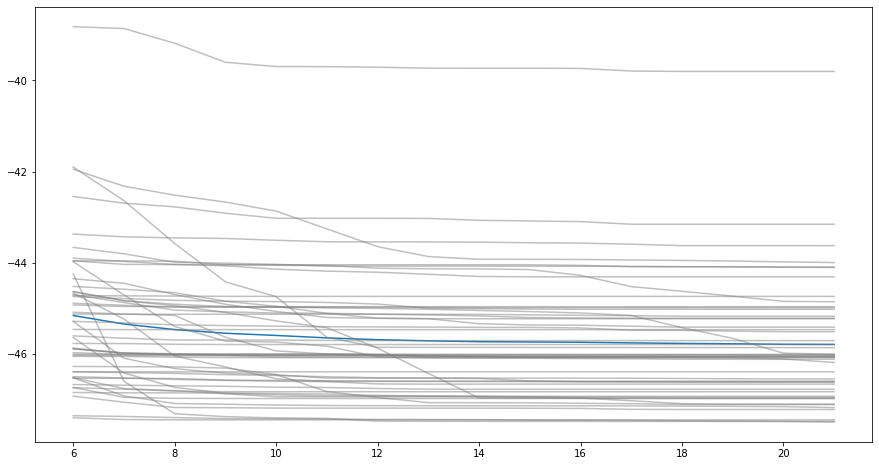

In [18]:
crop = 5
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_EM)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .5, color = 'grey')

In [21]:
num_samples = target_samples.shape[0]
epochs = 3000
loss_values_list_gmm_gradient = []
K = 10
for _ in range(50):
    initial_w = SoftmaxWeight(K, p, mode = 'Constant')
    dif = DIFDensityEstimator(target_samples,K)
    loss_values = dif.train(epochs,visual=False)
    loss_values_list_gmm_gradient.append(loss_values)

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 2381/3000 [00:11<00:02, 213.89it/s, loss = -41.041011810302734]


KeyboardInterrupt: 